### Problem Statement:
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking our knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading csv files
store=pd.read_csv('Sample - Superstore.csv',encoding='windows-1252')
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Analysing the data set

In [161]:
store.shape

(9994, 21)

In [162]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

No null values in the data set. All columns are of appropriate data type.

### Outlier analysis

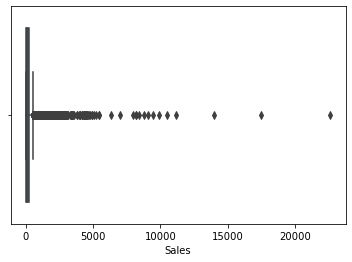

In [163]:
sns.boxplot(store.Sales)
plt.show()

In [164]:
store["Sales"].quantile([0.0,0.25,0.5,0.75,0.90,0.95,0.99,1.0])

0.00        0.444000
0.25       17.280000
0.50       54.490000
0.75      209.940000
0.90      572.706000
0.95      956.984245
0.99     2481.694600
1.00    22638.480000
Name: Sales, dtype: float64

There seem to be outliers in sales column since there is huge variation between 99th and 100th percentile. But there is no need to discard outliers.

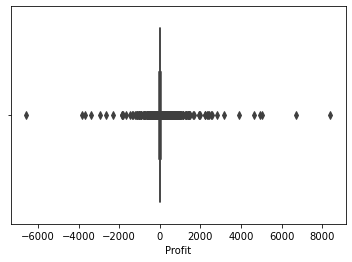

In [165]:
sns.boxplot(store.Profit)
plt.show()

In [166]:
store["Profit"].quantile([0.0,0.25,0.5,0.75,0.90,0.95,0.99,1.0])

0.00   -6599.978000
0.25       1.728750
0.50       8.666500
0.75      29.364000
0.90      89.281620
0.95     168.470400
0.99     580.657882
1.00    8399.976000
Name: Profit, dtype: float64

There seem to be outliers in Profit column as well since there is huge variation between 99th and 100th percentile.
But there is no need to discard outliers.

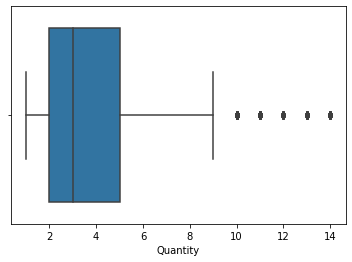

In [167]:
sns.boxplot(store.Quantity)
plt.show()

In [168]:
store["Quantity"].quantile([0.0,0.25,0.5,0.75,0.90,0.95,0.99,1.0])

0.00     1.0
0.25     2.0
0.50     3.0
0.75     5.0
0.90     7.0
0.95     8.0
0.99    11.0
1.00    14.0
Name: Quantity, dtype: float64

Distribution of quantity is normal and the values are valid.

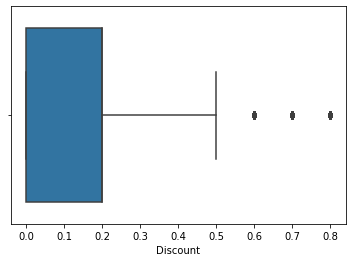

In [169]:
sns.boxplot(store.Discount)
plt.show()

Distribution of Discount is normal and all the values are valid.

## Univariate Analysis

Since we have to analyze Products, Regions, categories, customer segments.Let's do univariate analysis for them

In [170]:
store["Product Name"].value_counts().loc[lambda x:x>15]

Staple envelope               48
Staples                       46
Easy-staple paper             46
Avery Non-Stick Binders       20
Staples in misc. colors       19
Staple remover                18
KI Adjustable-Height Table    18
Storex Dura Pro Binders       17
Staple-based wall hangings    16
Name: Product Name, dtype: int64

Above products have the highest sales data. Hence they can be taken as the most popular products.

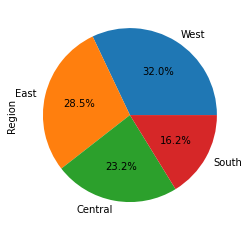

In [171]:
store["Region"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Among the regions, west seems to be the most popular in terms of sales count and south seems to be the least popular.

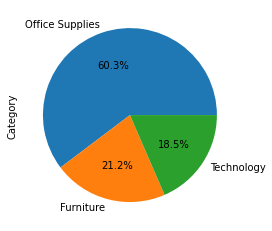

In [172]:
store["Category"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Among the categories, Office Supplies has the highest sales count and Technology has the least.

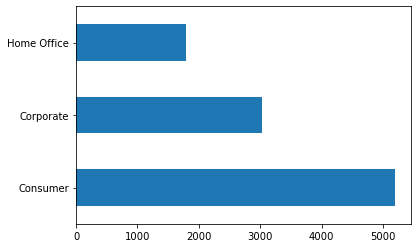

In [173]:
store["Segment"].value_counts().plot.barh()
plt.show()

Among the segments, Consumer segment is the most popular in terms of sales count and Home Office is the least popular.

### Bivariate Analysis

### Analysing Categories

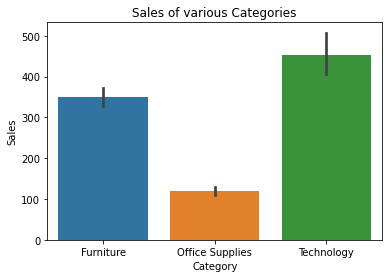

In [176]:
sns.barplot(data=store,x="Category",y="Sales")
plt.title("Sales of various Categories")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

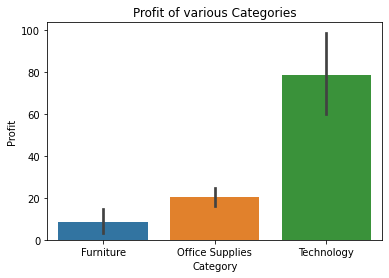

In [177]:
sns.barplot(data=store,x="Category",y="Profit")
plt.title("Profit of various Categories")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

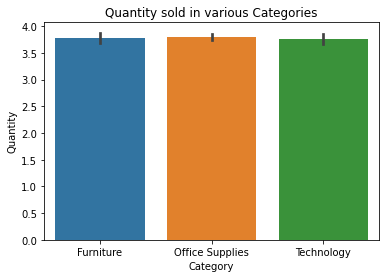

In [178]:
sns.barplot(data=store,x="Category",y="Quantity")
plt.title("Quantity sold in various Categories")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.show()

#### Among the various categories, though the quantity sold is same, Technology has the highest amount of sales and is the most profitable as well. Though Furniture has reasonable sales, it is the least profitable.

### Analysing Regions

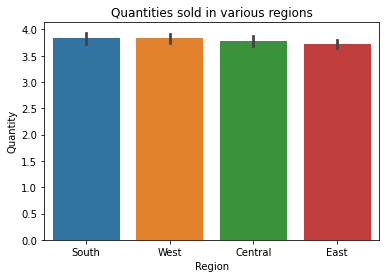

In [179]:
sns.barplot(data=store,x="Region",y="Quantity")
plt.title("Quantities sold in various regions")
plt.xlabel("Region")
plt.ylabel("Quantity")
plt.show()

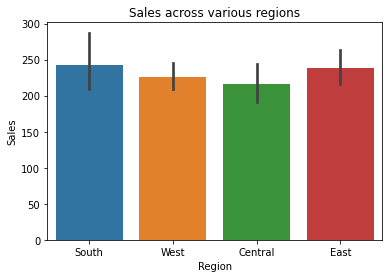

In [180]:
sns.barplot(data=store,x="Region",y="Sales")
plt.title("Sales across various regions")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

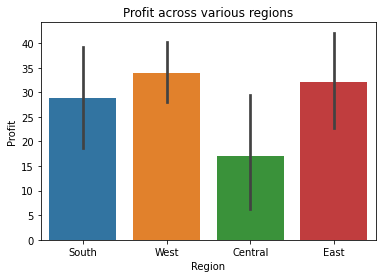

In [181]:
sns.barplot(data=store,x="Region",y="Profit")
plt.title("Profit across various regions")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()

#### Among the various regions, the quantity sold is almost same in all the regions. Though all regions have good amount of sales, West is the most profitable region and Central is the least profitable region.

### Analysing Segments

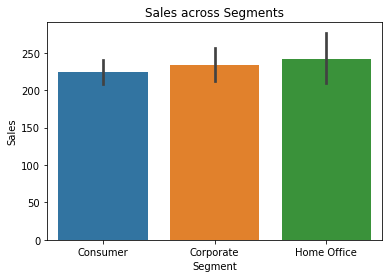

In [182]:
sns.barplot(data=store,x="Segment",y="Sales")
plt.title("Sales across Segments")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()

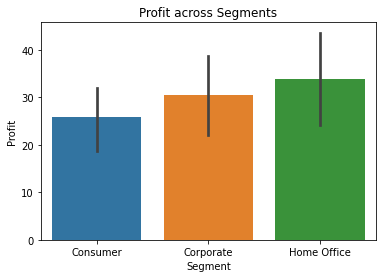

In [183]:
sns.barplot(data=store,x="Segment",y="Profit")
plt.title("Profit across Segments")
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.show()

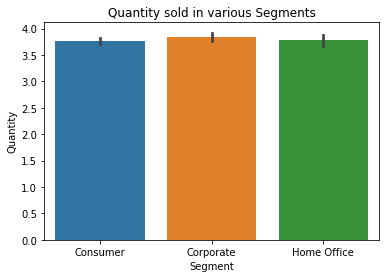

In [184]:
sns.barplot(data=store,x="Segment",y="Quantity")
plt.title("Quantity sold in various Segments")
plt.xlabel("Segment")
plt.ylabel("Quantity")
plt.show()

#### Among the various Segments, though the quantity sold is same, Home Office has the highest sales and is the most profitable as well. Consumer is the least profitable segment.

In [185]:
sales=pd.DataFrame(store.groupby(by=["Product Name","Category"])["Sales"].sum().sort_values(ascending=False).head(10))
sales.head(10)

,,Sales
Product Name,Category,
Canon imageCLASS 2200 Advanced Copier,Technology,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,Technology,22638.480
HON 5400 Series Task Chairs for Big and Tall,Furniture,21870.576
GBC DocuBind TL300 Electric Binding System,Office Supplies,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,Office Supplies,19024.500
Hewlett Packard LaserJet 3310 Copier,Technology,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",Technology,18374.895
GBC DocuBind P400 Electric Binding System,Office Supplies,17965.068


In [186]:
profit=pd.DataFrame(store.groupby(by=["Product Name","Category"])["Profit"].sum().sort_values(ascending=False).head(10))
profit.head(10)

,,Profit
Product Name,Category,
Canon imageCLASS 2200 Advanced Copier,Technology,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,7753.0390
Hewlett Packard LaserJet 3310 Copier,Technology,6983.8836
Canon PC1060 Personal Laser Copier,Technology,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",Technology,4094.9766
Ativa V4110MDD Micro-Cut Shredder,Technology,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",Technology,3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,Technology,3696.2820
Ibico EPK-21 Electric Binding System,Office Supplies,3345.2823


#### Generally products belonging to Technology category are highly profitable

### Multivariate Analysis

In [187]:
sales_values=pd.pivot_table(data=store, index="Region",columns="Category",values="Sales")
sales_values

Category,Furniture,Office Supplies,Technology
Region,,,
Central,340.534644,117.458801,405.753124
East,346.574383,120.044425,495.278469
South,353.309289,126.282727,507.753952
West,357.302325,116.422377,420.687533


In [188]:
profit_values=pd.pivot_table(data=store, index="Region",columns="Category",values="Profit")
profit_values

Category,Furniture,Office Supplies,Technology
Region,,,
Central,-5.968918,6.244712,80.231981
East,5.068496,23.957114,88.714084
South,20.395199,20.086827,68.231506
West,16.272914,27.733183,73.962687


Comparison of Sales and Profit across Regions and Categories shows Technology category to have the highest Sales and most profitable across all regions

In [189]:
sales_values1=pd.pivot_table(data=store, index="Region",columns="Segment",values="Sales")
sales_values1

Segment,Consumer,Corporate,Home Office
Region,,,
Central,207.946728,234.763466,208.248046
East,238.875539,228.516929,253.911805
South,233.390180,238.992025,272.996329
West,217.033955,235.265911,239.442692


In [190]:
profit_values1=pd.pivot_table(data=store, index="Region",columns="Segment",values="Profit")
profit_values1

Segment,Consumer,Corporate,Home Office
Region,,,
Central,7.066046,27.791831,28.398202
East,28.040153,26.935666,53.205611
South,32.116435,29.833771,16.987626
West,34.360409,35.872323,28.949939


A comparison of Sales and profit across Regions and Segments reveals a mixed trend.
Consumer segment has highest sales in East but it is highly profitable in West.
Corporate segment has highest sales in South but it is highly profitable in West.
Home Office segment has highest sales in South but it is highly profitable in East.

In [191]:
sales_values2=pd.pivot_table(data=store, index="Category",columns="Segment",values="Sales")
sales_values2

Segment,Consumer,Corporate,Home Office
Category,,,
Furniture,351.347091,354.519792,336.825131
Office Supplies,116.390194,126.745309,115.309021
Technology,427.339534,444.855810,535.976658


In [192]:
profit_values2=pd.pivot_table(data=store, index="Category",columns="Segment",values="Profit")
profit_values2

Segment,Consumer,Corporate,Home Office
Category,,,
Furniture,6.281293,11.741201,10.705465
Office Supplies,18.014174,22.102923,24.034439
Technology,74.445646,79.723823,89.152458


A comparison of Sales and profit across Categories and Segments reveals a clear message.
In all segments, Technology has the most sales and is the most profitable.

### Heat map

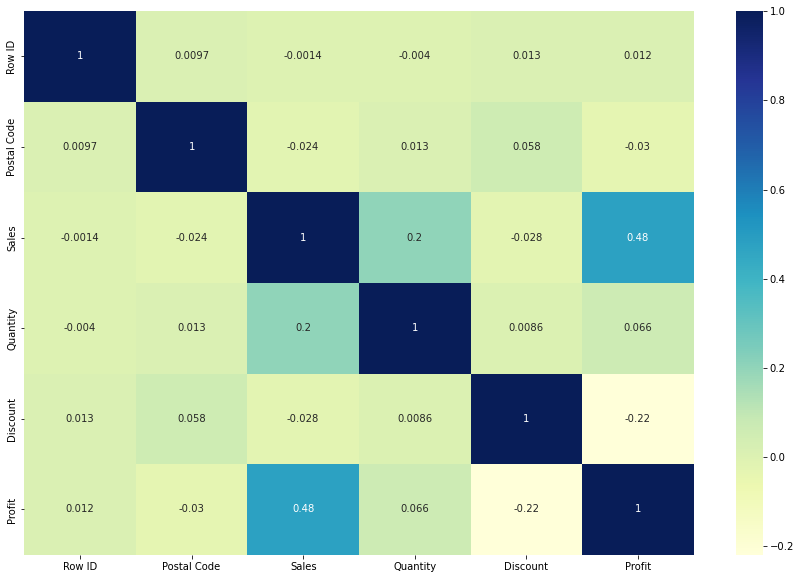

In [193]:
plt.figure(figsize=(15,10))
sns.heatmap(store.corr(),cmap="YlGnBu",annot=True)
plt.show()

From the heat map, we see a postive correlation between Sales and Profit. 
An increase in Sales causes an increse in Profit.
Profit and Discount has a negative correlation. Increase in discount would negatively impact profit.

#### Inferences:
1. Technology Category is the most profitable and Furniture is the least profitable across all regions.
2. Among the regions, West is the most profitable and Central is the least profitable.
3. All segments do well in all regions except for Central region.
4. Technology is the most popular category among all the segments. Though Furniture has reasonable sales, it is the least profitable in all the segments.
5. Majority of the most profitable products belong to Technology category only. 